# CRIM Intervals:  Melodic and Harmonic

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>

#### Read Documentation for Each Method
- Read the documentation with this command ```print(model.YourMethod.__doc__)```, where you will replace ```'YourMethod'``` with the name of the individual method, for example ```print(model.getMelodic.__doc__)```.


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

saved_csv folder already exists.


## B. Importing a Piece

### B.1 Import a Piece

In [2]:
git_prefix = 'https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/'

# just add the CRIM Piece ID here
mei_file = 'CRIM_Mass_0005_2.mei'


url = git_prefix + mei_file
# piece = importScore('Music_Files/Senfl_Ave_forCRIM.mei_msg.mei')
piece = importScore(url)
# piece = importScore('Music_Files/CRIM_Mass_0007_4.mei')

print(piece.metadata)


Successfully imported https://raw.githubusercontent.com/CRIM-Project/CRIM-online/master/crim/static/mei/MEI_4.0/CRIM_Mass_0005_2.mei
{'title': 'Missa Ave Maria: Gloria', 'composer': 'Antoine de Févin'}


### B.2 Check the Title

In [3]:
piece.score.metadata.title

## C. Melodic Patterns

** CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

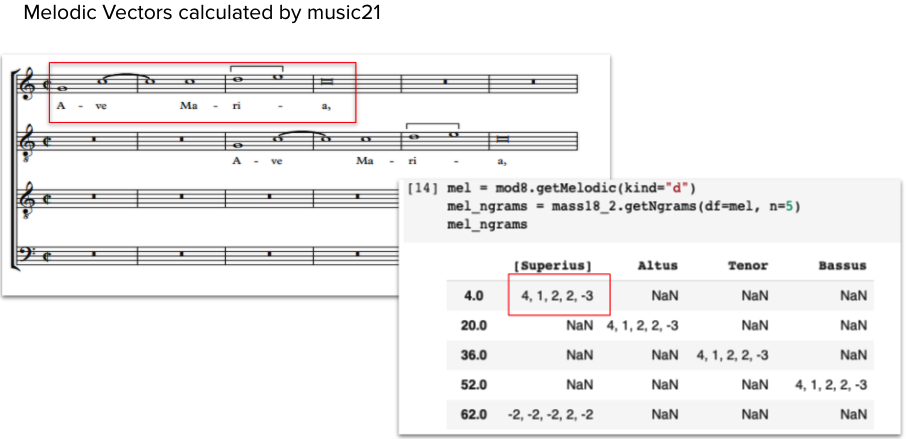


### C.1 Get the melodic intervals for each voice

* **`piece.getMelodic(kind="d")`** is the basic method to find any type of melodic interval

* Note that **`kind`** is a variable--you can change it, then run the cell to see the results.
<br>

* **`q`** = **diatonic with 'quality'** (thus distinguishing between P8, M3, and m3 intervals)
* **`d`** = **diatonic without quality** (just the interval:  8, 3)
* **`c`** = **chromatic** (here a unison will be **0**, and a tritone will be **6**)
* **`z`** = **zero-based** (diatonic, but with unison is represented as "0")
<br>
    
* compound intervals?
    * add **`compound=True`** to see 10ths and 3rds as different; **`compound=False`** for them to be the same.  
    * For example:  **`piece.getMelodic(kind="d", compound=True).fillna('-')`**
    
* no unisons?

    * adding **`combineUnisons=True`** to the request for notesRests will combine all unisons to a single note.  The total duration will be the same as for the individual notes, but now getMelodic (and getNgrams) will follow the contour of the melody as if there were no repeated note
    

In [4]:
mel = piece.getMelodic(kind="d").fillna('-')
mel.head(20)


,Sup[erius],Altus,Tenor,Bassus
0.0,Rest,-,Rest,Rest
4.0,-,4,-,-
8.0,Rest,-,Rest,Rest
12.0,-,1,-,-
16.0,Rest,2,Rest,Rest
20.0,-,2,-,-
24.0,4,-,Rest,Rest
26.0,-,-2,-,-
27.0,-,-2,-,-
28.0,-,4,-,-


In [5]:
nr = piece.getNoteRest(combineUnisons=True)
mel = piece.getMelodic(df=nr, kind='d', end=False)
ng = piece.getNgrams(df=mel, n=4)
mask = piece.getEntryMask()
result = ng[mask].dropna(how='all')
result.head()

,Sup[erius],Altus,Tenor,Bassus
0.0,NaN,"4, 2, 2, -2",NaN,NaN
20.0,"4, 2, 2, -2",NaN,NaN,NaN
82.0,"2, 2, -3, 4",NaN,NaN,NaN
92.0,NaN,NaN,"4, 2, 2, -3",NaN
96.0,NaN,NaN,NaN,"4, 2, 2, -3"


### C.2  Counting Intervals (and other operations)

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

<br>

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  **`nr.count`**
    * **rename a columns**:  **`nr.rename(columns = {'[Superius]':'Cantus'})`**
    * **stack all the columns** on top of each other to get one list of all the notes:  **`nr.stack()`**
    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece): **`nr.stack().nunique()`**
    * **count the number of each note in each part**:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`**
    * **count and sort** the number of notes in a single voice part:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values("[Superius]", ascending=False)`**

In [6]:
mel.apply(pd.Series.value_counts).fillna(0).astype(int)

,Sup[erius],Altus,Tenor,Bassus
-2,110,127,87,111
-3,14,24,20,24
-4,0,3,0,3
-5,0,4,1,9
-8,0,3,0,1
2,89,116,97,112
3,2,4,5,0
4,6,17,7,11
5,1,8,2,9
6,0,0,0,1


### C.2 Get Melodic nGrams
* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **melodic** or **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `getNgrams` method, we "pass" the results of `getMelodic` or `getHarmonic` (see below) to it.  For instance we set the variable name `mel` `model.getMelodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  `model.getNgrams(df=mel, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
    * `ngrams = model.getNgrams(df=model.getMelodic(kind="d", compound=False), n=4)`
   
* No Unisons?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.

In [7]:
pd.set_option('display.max_rows', None)
mel = piece.getMelodic(kind="d", compound=True)
ngrams = piece.getNgrams(df=mel, n=4)
piece.detailIndex(ngrams)

Sup[erius]           Altus           Tenor          Bassus
Measure Beat                                                                
1       3.00             NaN      4, 1, 2, 2             NaN             NaN
2       3.00             NaN     1, 2, 2, -2             NaN             NaN
3       1.00             NaN    2, 2, -2, -2             NaN             NaN
        3.00             NaN    2, -2, -2, 4             NaN             NaN
4       1.00      4, 1, 2, 2             NaN             NaN             NaN
        2.00             NaN   -2, -2, 4, -2             NaN             NaN
        2.50             NaN    -2, 4, -2, 2             NaN             NaN
        3.00             NaN    4, -2, 2, -2             NaN             NaN
5       1.00     1, 2, 2, -2   -2, 2, -2, -2             NaN             NaN
        2.00             NaN   2, -2, -2, -2             NaN             NaN
        3.00    2, 2, -2, -2             NaN             NaN             NaN
        4.00             NaN   -2, -2, -2, 3             NaN             NaN
        4.50             NaN   -2, -2, 3, -2             NaN             NaN
6       1.00    2, -2, -2, 4   -2, 3, -2, -2             NaN             NaN
        3.00             NaN    3, -2, -2, 2             NaN             NaN
        4.00   -2, -2, 4, -2             NaN             NaN             NaN
        4.50    -2, 4, -2, 2             NaN             NaN             NaN
7       1.00    4, -2, 2, -2   -2, -2, 2, -2             NaN             NaN
        3.00   -2, 2, -2, -2   -2, 2, -2, -2             NaN             NaN
        4.00   2, -2, -2, -2   2, -2, -2, -2             NaN             NaN
8       2.00   -2, -2, -2, 2  -2, -2, -2, -2             NaN             NaN
        2.50   -2, -2, 2, -2   -2, -2, -2, 5             NaN             NaN
        3.00    -2, 2, -2, 2    -2, -2, 5, 2             NaN             NaN
9       1.00    2, -2, 2, -2     -2, 5, 2, 2             NaN             NaN
        2.00             NaN     5, 2, 2, -3             NaN             NaN
        3.00   -2, 2, -2, -2     2, 2, -3, 4             NaN             NaN
        4.00   2, -2, -2, -2    2, -3, 4, -2             NaN             NaN
10      1.00             NaN    -3, 4, -2, 2             NaN             NaN
        2.00             NaN    4, -2, 2, -2             NaN             NaN
        4.00             NaN    -2, 2, -2, 2             NaN             NaN
11      1.00             NaN    2, -2, 2, -2             NaN             NaN
        3.00     2, 2, -3, 4   -2, 2, -2, -2             NaN             NaN
        4.00    2, -3, 4, -2   2, -2, -2, -2             NaN             NaN
12      1.00    -3, 4, -2, 2             NaN             NaN             NaN
        2.00             NaN  -2, -2, -2, -2             NaN             NaN
13      1.00             NaN             NaN      1, 1, 4, 1             NaN
        3.00             NaN             NaN      1, 4, 1, 2      1, 1, 4, 1
14      1.00             NaN             NaN      4, 1, 2, 1      1, 4, 1, 2
        3.00             NaN             NaN      1, 2, 1, 2      4, 1, 2, 1
        4.00             NaN             NaN      2, 1, 2, 1             NaN
15      1.00             NaN             NaN             NaN      1, 2, 1, 2
        2.00             NaN             NaN     1, 2, 1, -3      2, 1, 2, 1
        4.00             NaN             NaN             NaN     1, 2, 1, -3
17      1.00             NaN             NaN    4, -2, -2, 2             NaN
        3.00             NaN             NaN             NaN     5, 2, 2, -2
        4.00             NaN             NaN   -2, -2, 2, -2    2, 2, -2, -2
        4.50             NaN             NaN   -2, 2, -2, -2             NaN
18      1.00             NaN             NaN   2, -2, -2, -2   2, -2, -2, -2
        3.00             NaN             NaN  -2, -2, -2, -2   -2, -2, -2, 1
        4.00             NaN             NaN  -2, -2, -2, -2   -2, -2, 1, -2
19      1.50  

In [8]:
nr = piece.getNoteRest(combineUnisons=True)
mel = piece.getMelodic(df=nr, kind='d', end=False)
ng = piece.getNgrams(df=mel, n=4)
mask = piece.getEntryMask()
result = ng[mask].dropna(how='all')
result.head()

,Sup[erius],Altus,Tenor,Bassus
0.0,NaN,"4, 2, 2, -2",NaN,NaN
20.0,"4, 2, 2, -2",NaN,NaN,NaN
82.0,"2, 2, -3, 4",NaN,NaN,NaN
92.0,NaN,NaN,"4, 2, 2, -3",NaN
96.0,NaN,NaN,NaN,"4, 2, 2, -3"



We can also display **measure+beat addresses**

*  The results of the previous **nGram** method are now 'passed' to the **detailIndex** method

In [9]:
piece.detailIndex(ngrams, offset=True)

Sup[erius]           Altus           Tenor  \
Measure Beat Offset                                                   
1       3.00 4.0                NaN      4, 1, 2, 2             NaN   
2       3.00 12.0               NaN     1, 2, 2, -2             NaN   
3       1.00 16.0               NaN    2, 2, -2, -2             NaN   
        3.00 20.0               NaN    2, -2, -2, 4             NaN   
4       1.00 24.0        4, 1, 2, 2             NaN             NaN   
        2.00 26.0               NaN   -2, -2, 4, -2             NaN   
        2.50 27.0               NaN    -2, 4, -2, 2             NaN   
        3.00 28.0               NaN    4, -2, 2, -2             NaN   
5       1.00 32.0       1, 2, 2, -2   -2, 2, -2, -2             NaN   
        2.00 34.0               NaN   2, -2, -2, -2             NaN   
        3.00 36.0      2, 2, -2, -2             NaN             NaN   
        4.00 38.0               NaN   -2, -2, -2, 3             NaN   
        4.50 39.0               NaN   -2, -2, 3, -2             NaN   
6       1.00 40.0      2, -2, -2, 4   -2, 3, -2, -2             NaN   
        3.00 44.0               NaN    3, -2, -2, 2             NaN   
        4.00 46.0     -2, -2, 4, -2             NaN             NaN   
        4.50 47.0      -2, 4, -2, 2             NaN             NaN   
7       1.00 48.0      4, -2, 2, -2   -2, -2, 2, -2             NaN   
        3.00 52.0     -2, 2, -2, -2   -2, 2, -2, -2             NaN   
        4.00 54.0     2, -2, -2, -2   2, -2, -2, -2             NaN   
8       2.00 58.0     -2, -2, -2, 2  -2, -2, -2, -2             NaN   
        2.50 59.0     -2, -2, 2, -2   -2, -2, -2, 5             NaN   
        3.00 60.0      -2, 2, -2, 2    -2, -2, 5, 2             NaN   
9       1.00 64.0      2, -2, 2, -2     -2, 5, 2, 2             NaN   
        2.00 66.0               NaN     5, 2, 2, -3             NaN   
        3.00 68.0     -2, 2, -2, -2     2, 2, -3, 4             NaN   
        4.00 70.0     2, -2, -2, -2    2, -3, 4, -2             NaN   
10      1.00 72.0               NaN    -3, 4, -2, 2             NaN   
        2.00 74.0               NaN    4, -2, 2, -2             NaN   
        4.00 78.0               NaN    -2, 2, -2, 2             NaN   
11      1.00 80.0               NaN    2, -2, 2, -2             NaN   
        3.00 84.0       2, 2, -3, 4   -2, 2, -2, -2             NaN   
        4.00 86.0      2, -3, 4, -2   2, -2, -2, -2             NaN   
12      1.00 88.0      -3, 4, -2, 2             NaN             NaN   
        2.00 90.0               NaN  -2, -2, -2, -2             NaN   
13      1.00 96.0               NaN             NaN      1, 1, 4, 1   
        3.00 100.0              NaN             NaN      1, 4, 1, 2   
14      1.00 104.0              NaN             NaN      4, 1, 2, 1   
        3.00 108.0              NaN             NaN      1, 2, 1, 2   
        4.00 110.0              NaN             NaN      2, 1, 2, 1   
15      1.00 112.0              NaN             NaN             NaN   
        2.00 114.0              NaN             NaN     1, 2, 1, -3   
        4.00 118.0              NaN             NaN             NaN   
17      1.00 128.0              NaN             NaN    4, -2, -2, 2   
        3.00 132.0              NaN             NaN             NaN   
        4.00 134.0              NaN             NaN   -2, -2, 2, -2   
        4.50 135.0              NaN             NaN   -2, 2, -2, -2   
18      1.00 136.0              NaN             NaN   2, -2, -2, -2   
        3.00 140.0              NaN             NaN  -2, -2, -2, -2   
        4.00 142.0              NaN             NaN  -2, -2, -2, -2   
19      1.50 145.0              NaN             NaN             NaN   
        2.00 146.0              NaN             NaN   -2, -2, -2, 2   
        3.00 148.0              NaN             NaN    -2, -2, 2, 2   
        4.00 150.0              NaN             NaN             NaN   
20      1.00 152.0              NaN             N

### C.3 How Many nGrams?

* Pandas includes many **built-in methods** that make it simple to summarize and explore data
<br>

* `value_counts()` tells us how many of each nGram in each voice:  `ngrams.value_counts().to_frame()`
    
<br>

* `stack()` combines all the voices into one column, so we can see the nGrams of the piece in one view: 
`ngrams.stack().value_counts().to_frame()`

In [10]:
ngrams.stack().value_counts().to_frame()

,0
"-2, -2, -2, 2",51
"2, -2, -2, -2",51
"-2, -2, -2, -2",45
"2, 2, 2, 2",36
"2, 2, -2, -2",27
"-2, -2, 2, 2",27
"2, 2, 2, -2",27
"-2, -2, 2, -2",24
"-2, 2, 2, 2",17
"-2, 2, -2, -2",16


### C.4 Search Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to **interact** with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [11]:
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], endpoint=["first", "last"]):
    ngrams = piece.getNgrams(df=piece.getMelodic(kind=kind), n=length, offsets=endpoint)
    mask = ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)
    filtered_ngrams = ngrams[mask].copy()
    bm1 = piece.detailIndex(filtered_ngrams, offset=True)
    return bm1.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Harmonic Intervals and nGrams

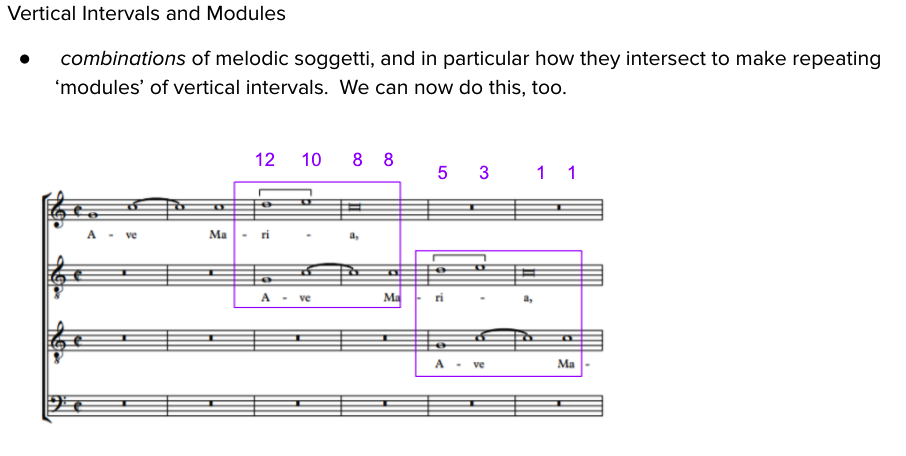

### D.1 getHarmonic

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)

In [12]:
harm = piece.getHarmonic(kind="c", compound=False).fillna("-")
piece.detailIndex(harm, offset=True)

Bassus_Tenor Bassus_Altus Bassus_Sup[erius] Tenor_Altus  \
Measure Beat Offset                                                           
1       1.00 0.0            Rest         Rest              Rest        Rest   
        3.00 4.0               -         Rest                 -        Rest   
2       3.00 8.0            Rest         Rest              Rest        Rest   
             12.0              -         Rest                 -        Rest   
3       1.00 16.0           Rest         Rest              Rest        Rest   
        3.00 20.0              -         Rest              Rest        Rest   
4       1.00 24.0           Rest         Rest              Rest        Rest   
        2.00 26.0              -         Rest                 -        Rest   
        2.50 27.0              -         Rest                 -        Rest   
        3.00 28.0              -         Rest                 -        Rest   
5       1.00 32.0           Rest         Rest              Rest        Rest   
        2.00 34.0              -         Rest                 -        Rest   
        3.00 36.0              -            -              Rest           -   
        4.00 38.0              -         Rest                 -        Rest   
        4.50 39.0              -         Rest                 -        Rest   
6       1.00 40.0           Rest         Rest              Rest        Rest   
        3.00 44.0              -         Rest                 -        Rest   
        4.00 46.0              -            -              Rest           -   
        4.50 47.0              -            -              Rest           -   
7       1.00 48.0           Rest         Rest              Rest        Rest   
        3.00 52.0              -         Rest              Rest        Rest   
        4.00 54.0              -         Rest              Rest        Rest   
8       2.00 58.0              -         Rest              Rest        Rest   
        2.50 59.0              -         Rest              Rest        Rest   
        3.00 60.0              -         Rest              Rest        Rest   
        4.00 56.0           Rest         Rest              Rest        Rest   
9       1.00 64.0           Rest         Rest              Rest        Rest   
        2.00 66.0              -         Rest                 -        Rest   
        3.00 68.0              -         Rest              Rest        Rest   
        4.00 70.0              -         Rest              Rest        Rest   
10      1.00 72.0           Rest         Rest              Rest        Rest   
        2.00 74.0              -         Rest              Rest        Rest   
        2.50 75.0              -            -              Rest           -   
        3.00 76.0              -            -              Rest           -   
        4.00 78.0              -         Rest                 -        Rest   
11      1.00 80.0           Rest         Rest              Rest        Rest   
        2.00 82.0              -            -              Rest           -   
        3.00 84.0              -         Rest              Rest        Rest   
        4.00 86.0              -         Rest              Rest        Rest   
12      1.00 88.0           Rest         Rest              Rest        Rest   
        2.00 90.0              -         Rest              Rest        Rest   
        2.50 91.0              -         Rest                 -        Rest   
        3.00 92.0           Rest         Rest                 -           7   
        4.00 94.0              -            -              Rest           -   
13      1.00 96.0              7            0                 0           5   
        3.00 100.0             7            0                 0           5   
14      1.00 104.0             0         Rest              Rest        Rest   
        3.00 108.0             7         Rest              Rest        Rest   
        4.00 110.0             9            -                 -       

### D.2 Search Harmonic nGrams

* See Section **C.4** for explanation of the interactive search.
<br>

* Examples:
<br>

* Two patterns: `12, 10, 8, 8|5, 3, 1, 1`
<br>

* Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
 <br>
 
* Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [13]:
# note that time_unit does not yet work with getHarmonic
@interact
def get_harmonic_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[3, 4, 5, 6], endpoint=["first", "last"]):    
    piece_harmonic = piece.getHarmonic(kind=kind, compound=compound)
    ngrams = piece.getNgrams(df=piece_harmonic, n=length, offsets=endpoint)
    filtered_ngrams = ngrams[ngrams.apply(lambda x: x.astype(str).str.contains(search_pattern).any(), axis=1)].copy()
    bm2 = piece.detailIndex(filtered_ngrams, offset=True)
   
    return bm2.fillna("-").style.applymap(lambda x: "background: #ccebc5" if re.match(search_pattern, x) else "")
    



interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## E. Corpus Inventory

### E.1  Corpus Melodic Inventory

In [14]:
#  first the list of pieces
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0005_1.mei', 
                     'https://crimproject.org/mei/CRIM_Mass_0005_2.mei', 
                     'https://crimproject.org/mei/CRIM_Mass_0005_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0005_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0005_5.mei',
                     'https://crimproject.org/mei/CRIM_Model_0008.mei'])



Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei


mei.base: WARNING: Importing <slur> without @startid and @endid is not yet supported.


Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_5.mei
Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei


#### - Now get the ngrams for all of them.  
#### - In this case:  modules of length "3", with diatonic
#### - Then 'combine' them into one frame

In [33]:
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0014_3.mei',
                             'https://crimproject.org/mei/CRIM_Model_0009.mei'])
func1 = ImportedPiece.getMelodic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)
func2 = ImportedPiece.getNgrams
list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=False)

pd.concat(list_of_melodic_ngrams )


Memoized piece detected.
Memoized piece detected.


,Sup[erius],Contratenor,Tenor,Bassus,Composer,Title,Superius
0.0,NaN,"1, -2, 2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
8.0,NaN,"-2, 2, -2, 2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
12.0,NaN,"2, -2, 2, 2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
16.0,"1, -2, 2, -2","-2, 2, 2, 2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
22.0,NaN,"2, 2, 2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
24.0,"-2, 2, -2, 2","2, 2, -2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
28.0,"2, -2, 2, 2","2, -2, -2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
32.0,"-2, 2, 2, 2","-2, -2, -2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
38.0,"2, 2, 2, -2","-2, -2, -2, -2",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
40.0,"2, 2, -2, -2","-2, -2, -2, 1",NaN,NaN,"Antoine de Févin, Antoine de Févin, Antoine de...","Missa Mente tota: Credo, Missa Mente tota: Cre...",NaN
